In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [00:21<00:00, 151MB/s]
100% 2.70G/2.70G [00:21<00:00, 137MB/s]


In [5]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [6]:
import cv2
from google.colab.patches import cv2_imshow

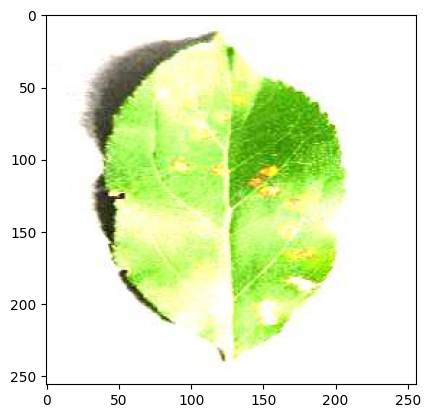

In [21]:
image_path = '/content/test/test/AppleCedarRust1.JPG'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [27]:
model = tf.keras.models.load_model('/content/Plant_disease_detection.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 28 variables whereas the saved optimizer has 54 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [28]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.array([image])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [30]:
prediction = model.predict(image)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[1.2929776e-09, 4.3401693e-10, 1.0000000e+00, 1.5442789e-11,
        6.1314189e-09, 2.6409070e-08, 2.9397175e-12, 2.4875244e-10,
        7.6055183e-14, 5.5817759e-12, 9.3348376e-15, 8.5005403e-10,
        2.1102963e-11, 2.4749934e-13, 7.8856054e-11, 8.3515622e-10,
        3.9317552e-10, 4.5594505e-12, 4.3003956e-09, 4.4431103e-10,
        4.7093271e-12, 9.6583269e-11, 9.9319419e-10, 1.6324422e-09,
        9.0460252e-12, 9.9481465e-11, 2.2000436e-11, 1.7287782e-11,
        1.5346679e-08, 4.4432902e-09, 7.9596409e-09, 4.4304824e-11,
        1.1666094e-09, 1.3730460e-12, 5.4265104e-10, 2.3833311e-09,
        9.5538889e-12, 2.9879613e-11]], dtype=float32)

In [31]:
prediction = np.argmax(prediction)
prediction

2

In [32]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [34]:
class_names = training_set.class_names

In [37]:
len(class_names)

38

The given leaf is  Apple___Cedar_apple_rust


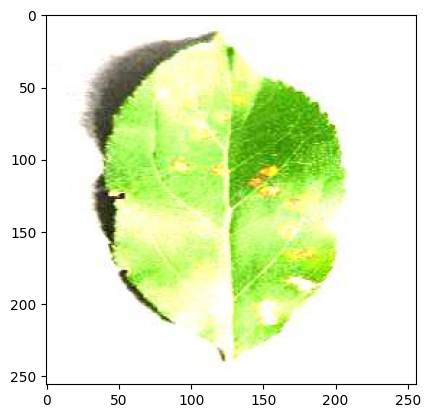

In [42]:
print('The given leaf is ', class_names[prediction])
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)